In [1]:
#2.	What is the trend of hate crime offense types over years? (Offense_Name)

#The top 10 offense types over the review period are 
# 1.	Destruction/Damage/Vandalism of Property    	22,436
# 2.	Intimidation                                			17,902
# 3.	Simple Assault                             			15,128
# 4.	Aggravated Assault                           		7,167
# 5.	Multiple                                     			3,478
# 6.	Other                                        			2,923
# 7.	Robbery                                      			1,275
# 8.	Burglary/Breaking & Entering                 		1,185
# 9.	All Other Larceny                            		 955
# 10.	Drug/Narcotic Violations                      		445

#The top five categories are plotted by year to show that all cateogories are trending upward, except a leveling off for
#simple assault numbers.  This may be that assault types are escalating from simple to aggravated which has seen a rise. 

#Property damage as seen the shaprest rise and is the largest category.  


In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# Read CSV file, used version 3
q2_df = pd.read_csv('hate_crime_v3.csv', low_memory = False)
q2_df.head(20)

,INCIDENT_ID,DATA_YEAR,DATA_MONTH,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,BIAS_TYPE,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,August,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
1,3016,1991,September,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-White,Individual,S,S
2,43,1991,July,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
3,44,1991,December,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-White,Individual,M,S
4,3017,1991,December,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-Race/Ethnicity,Anti-White,Individual,S,S
5,3018,1991,July,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-Race/Ethnicity,Anti-White,Individual,S,S
6,3019,1991,November,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Aggravated Assault,1.0,School/College,Anti-Race/Ethnicity,Anti-White,Individual,S,S
7,45,1991,July,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,...,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-Race/Ethnicity,Anti-White,Individual,M,S
8,46,1991,October,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Intimidation,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-White,Individual,S,S
9,3020,1991,October,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-White,Individual,S,S


In [4]:
# Removing data before 2007
q2_df = q2_df.loc[q2_df['DATA_YEAR']>=2007, :]

In [5]:
q2_df.head(50)

,INCIDENT_ID,DATA_YEAR,DATA_MONTH,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,BIAS_TYPE,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
121300,125705,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Other/Unknown,Anti-Disability,Anti-Mental Disability,Individual,S,S
121301,125706,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121302,125707,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121303,125708,2007,April,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121304,125709,2007,May,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121305,125710,2007,June,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121306,125711,2007,August,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121307,125712,2007,September,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,1.0,Field/Woods,Anti-Race/Ethnicity,"Anti-Multiple Races, Group",Individual,S,S
121308,121302,2007,October,AL0011200,Hoover,NaN,City,AL,Alabama,East South Central,...,NaN,1,Simple Assault,1.0,Residence/Home,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121309,121303,2007,December,AL0011200,Hoover,NaN,City,AL,Alabama,East South Central,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S


In [6]:
print(q2_df.columns)

Index(['INCIDENT_ID', 'DATA_YEAR', 'DATA_MONTH', 'ORI', 'PUB_AGENCY_NAME',
       'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'DIVISION_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'ADULT_VICTIM_COUNT',
       'JUVENILE_VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'BIAS_TYPE', 'VICTIM_TYPES',
       'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')


In [8]:
# Reorganizing data frame with only the variables needed for question 2 and groupby year.
# df_grouped = organized_df.groupby('DATA_YEAR').count()
# df_grouped.head(11)

q2_organized_df = q2_df[["DATA_YEAR","OFFENSE_NAME","MULTIPLE_OFFENSE","BIAS_DESC"]]
print(q2_organized_df['BIAS_DESC'].unique())
print(len(q2_organized_df['OFFENSE_NAME'].unique()))
print(q2_organized_df['MULTIPLE_OFFENSE'].unique())

['Anti-Disability' 'Anti-Race/Ethnicity' 'Anti-Sexual Orientation'
 'Anti-Religion' 'Anti-Gender']
239
['S' 'M']


In [9]:
q2_organized_df.head(20)

,DATA_YEAR,OFFENSE_NAME,MULTIPLE_OFFENSE,BIAS_DESC
121300,2007,Simple Assault,S,Anti-Disability
121301,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121302,2007,Aggravated Assault,S,Anti-Sexual Orientation
121303,2007,Simple Assault,S,Anti-Sexual Orientation
121304,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121305,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121306,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121307,2007,Simple Assault,S,Anti-Race/Ethnicity
121308,2007,Simple Assault,S,Anti-Sexual Orientation
121309,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity


In [10]:
# Recode to "Multiple" for records with "M" in MULTIPLE_OFFENSE column to reduce the unique values in OFFENSE_NAME.
# Or can recode Multiple for any in the column with ";" which is only used to list multiples.
# Example from StackOverflow... df.loc[df.col1 == 'Yes', 'col2'] = ''
# Another example df.loc[df.ID == 103, 'FirstName'] = "Matt"
q2_organized_df.loc[q2_organized_df.MULTIPLE_OFFENSE == 'M' , 'OFFENSE_NAME'] = 'Multiple'




C:\Users\crist\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
q2_organized_df.head(20)

,DATA_YEAR,OFFENSE_NAME,MULTIPLE_OFFENSE,BIAS_DESC
121300,2007,Simple Assault,S,Anti-Disability
121301,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121302,2007,Aggravated Assault,S,Anti-Sexual Orientation
121303,2007,Simple Assault,S,Anti-Sexual Orientation
121304,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121305,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121306,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121307,2007,Simple Assault,S,Anti-Race/Ethnicity
121308,2007,Simple Assault,S,Anti-Sexual Orientation
121309,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity


In [12]:
print(q2_organized_df['OFFENSE_NAME'].value_counts())
#There are 47 categories.  Report top 10, recode smaller categories to Other

Destruction/Damage/Vandalism of Property       22436
Intimidation                                   17902
Simple Assault                                 15128
Aggravated Assault                              7167
Multiple                                        3478
Robbery                                         1275
Burglary/Breaking & Entering                    1185
All Other Larceny                                955
Drug/Narcotic Violations                         445
Theft From Motor Vehicle                         347
Shoplifting                                      334
Arson                                            326
Theft From Building                              249
Not Specified                                    246
Motor Vehicle Theft                              213
Drug Equipment Violations                        130
False Pretenses/Swindle/Confidence Game          130
Rape                                             112
Weapon Law Violations                         

In [13]:
# Rename smaller categories to "Other" to reduce number of reporting categories for better visualization.

q2_organized_df = q2_organized_df.replace(
    {"Theft From Motor Vehicle": "Other", "Shoplifting": "Other", "Arson": "Other", "Theft From Building": "Other", 
     "Not Specified": "Other", "Motor Vehicle Theft": "Other", "False Pretenses/Swindle/Confidence Game": "Other",
    "Drug Equipment Violations": "Other", "Rape": "Other", "Weapon Law Violations": "Other", "Counterfeiting/Forgery": "Other",
    "Fondling": "Other", "Impersonation": "Other", "Credit Card/Automated Teller Machine Fraud": "Other", 
     "Murder and Nonnegligent Manslaughter": "Other", "Theft of Motor Vehicle Parts or Accessories": "Other", 
     "Stolen Property Offenses": "Other", "Kidnapping/Abduction": "Other", "Embezzlement": "Other", "Sodomy": "Other", 
    "Extortion/Blackmail": "Other", "Sexual Assault With An Object": "Other", "Pocket-picking": "Other", 
    "Pornography/Obscene Material": "Other", "Statutory Rape": "Other", "Wire Fraud": "Other", "Identity Theft": "Other",
    "Purse-snatching": "Other", "Theft From Coin-Operated Machine or Device": "Other", "Assisting or Promoting Prostitution": "Other",
   "Incest": "Other", "Human Trafficking, Commercial Sex Acts": "Other", "Hacking/Computer Invasion": "Other", 
    "Purchasing Prostitution": "Other", "Prostitution": "Other", "Betting/Wagering": "Other", "Bribery": "Other",
    "Negligent Manslaughter": "Other"})

print(q2_organized_df['OFFENSE_NAME'].value_counts())


Destruction/Damage/Vandalism of Property    22436
Intimidation                                17902
Simple Assault                              15128
Aggravated Assault                           7167
Multiple                                     3478
Other                                        2923
Robbery                                      1275
Burglary/Breaking & Entering                 1185
All Other Larceny                             955
Drug/Narcotic Violations                      445
Name: OFFENSE_NAME, dtype: int64


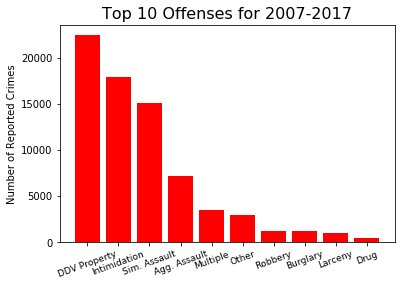

In [153]:
#Bar chart for 2007-2017 total number of crimes by offense name(type)
x = np.arange(10)
y = [22436, 17902, 15128, 7167, 3478, 2923, 1275, 1185, 955, 445]

plt.xticks(x, ('DDV Property', 'Intimidation', 'Sim. Assault', 'Agg. Assault', 'Multiple', 'Other', 'Robbery', 'Burglary', 'Larceny', 'Drug'), rotation=(20), fontsize=9)

plt.bar(x, y, color='r')
plt.title("Top 10 Offenses for 2007-2017", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.savefig("Q2_Top_10_Offenses.png")


In [14]:
print(q2_organized_df['BIAS_DESC'].value_counts())

Anti-Race/Ethnicity        43502
Anti-Religion              14371
Anti-Sexual Orientation    13753
Anti-Disability              980
Anti-Gender                  288
Name: BIAS_DESC, dtype: int64


In [15]:
q2_df_grouped = q2_organized_df.groupby('DATA_YEAR')
q2_df_grouped['BIAS_DESC'].value_counts()

DATA_YEAR  BIAS_DESC              
2007       Anti-Race/Ethnicity        4892
           Anti-Religion              1397
           Anti-Sexual Orientation    1277
           Anti-Disability              59
2008       Anti-Race/Ethnicity        5057
           Anti-Religion              1552
           Anti-Sexual Orientation    1337
           Anti-Disability              93
2009       Anti-Race/Ethnicity        3992
           Anti-Religion              1298
           Anti-Sexual Orientation    1228
           Anti-Disability              94
2010       Anti-Race/Ethnicity        3985
           Anti-Religion              1322
           Anti-Sexual Orientation    1278
           Anti-Disability              43
2011       Anti-Race/Ethnicity        3688
           Anti-Sexual Orientation    1310
           Anti-Religion              1237
           Anti-Disability              64
2012       Anti-Race/Ethnicity        3858
           Anti-Religion              1319
           Anti-Sex

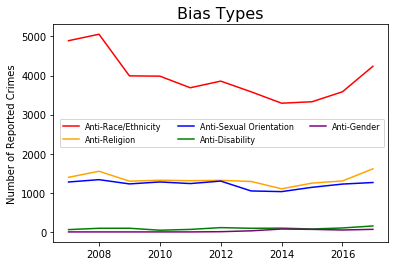

In [135]:
bias_desc_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Anti-Race/Ethnicity': (4892, 5057, 3992, 3985, 3688, 3858, 3584, 3293, 3330, 3585, 4238), 'Anti-Religion': (1397, 1552, 1298, 1322, 1310, 1319, 1291, 1103, 1249, 1304, 1614), 'Anti-Sexual Orientation': (1277, 1337, 1228, 1278, 1237, 1300, 1048, 1031, 1141, 1224, 1264), 'Anti-Disability': (59, 93, 94, 43, 64, 110, 93, 96, 75, 101, 152), 'Anti-Gender': (0,0,0,0,0, 6, 28, 74, 65, 49, 66)})
plt.plot('x', 'Anti-Race/Ethnicity', data=bias_desc_trend_df, marker='', color='red')
plt.plot('x', 'Anti-Religion', data=bias_desc_trend_df, marker='', color='orange')
plt.plot('x', 'Anti-Sexual Orientation', data=bias_desc_trend_df, marker='', color='blue')
plt.plot('x', 'Anti-Disability', data=bias_desc_trend_df, marker='', color='green')
plt.plot('x', 'Anti-Gender', data=bias_desc_trend_df, marker='', color='purple')
plt.title("Bias Types", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(ncol=3, fontsize=8)
#plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1.00),
          #ncol=1, fancybox=True, shadow=True, fontsize=12)
plt.savefig("Q2_Bias_Types.png")

In [42]:
q2_offense_name_trend_df = q2_df_grouped['OFFENSE_NAME'].value_counts()
q2_offense_name_trend_df = pd.DataFrame(q2_offense_name_trend_df)
q2_offense_name_trend_df

# Make a line graph with this data.  x = years, y = Offense name, there should be 10 lines

OFFENSE_NAME
DATA_YEAR OFFENSE_NAME                                          
2007      Destruction/Damage/Vandalism of Property          2632
          Intimidation                                      1892
          Simple Assault                                    1329
          Aggravated Assault                                 765
          Multiple                                           429
          Other                                              220
          Robbery                                            151
          Burglary/Breaking & Entering                       111
          All Other Larceny                                   93
          Drug/Narcotic Violations                             3
2008      Destruction/Damage/Vandalism of Property          2786
          Intimidation                                      2057
          Simple Assault                                    1459
          Aggravated Assault                                 727
          Multiple                                           430
          Other                                              239
          Robbery                                            120
          Burglary/Breaking & Entering                       115
          All Other Larceny                                  100
          Drug/Narcotic Violations                             6
2009      Destruction/Damage/Vandalism of Property          2186
          Intimidation                                      1577
          Simple Assault                                    1393
          Aggravated Assault                                 629
          Multiple                                           414
          Other                                              158
          Robbery                                             91
          Burglary/Breaking & Entering                        87
          All Other Larceny                                   66
          Drug/Narcotic Violations                            11
...                                                          ...
2015      Destruction/Damage/Vandalism of Property          1590
          Intimidation                                      1430
          Simple Assault                                    1377
          Aggravated Assault                                 625
          Other                                              266
          Multiple                                           216
          Burglary/Breaking & Entering                       120
          Robbery                                            112
          All Other Larceny                                   98
          Drug/Narcotic Violations                            26
2016      Destruction/Damage/Vandalism of Property          1782
          Intimidation                                      1528
          Simple Assault                                    1411
          Aggravated Assault                                 628
          Other                                              329
          Multiple                                           266
          Robbery                                            111
          Burglary/Breaking & Entering                        92
          All Other Larceny                                   73
          Drug/Narcotic Violations                            43
2017      Destruction/Damage/Vandalism of Property          2185
          Intimidation                                      1738
          Simple Assault                                    1379
          Aggravated Assault                                 736
          Other                                              455
          Multiple                                           317
          Robbery                                            141
          All Other Larceny                                  139
          Drug/Narcotic Violations                           132
          Burglary/Bre

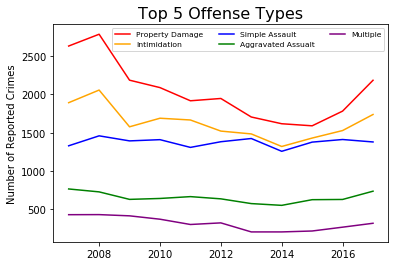

In [132]:

offense_name_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Property Damage': (2632, 2786, 2186, 2089, 1917, 1947, 1705, 1617, 1590, 1782, 2185), 'Intimidation': (1892, 2057, 1577, 1689, 1666, 1521, 1484, 1320, 1430, 1528, 1738), 'Simple Assault': (1329, 1459, 1393, 1409, 1308, 1382, 1424, 1257, 1377, 1411, 1379), 'Aggravated Assualt': (765, 727, 629, 641, 665, 636, 574, 551, 625, 628, 736), 'Multiple': (429, 430, 414, 370, 301, 322, 204, 204, 216, 266, 317)})
plt.plot('x', 'Property Damage', data=offense_name_trend_df, marker='', color='red')
plt.plot('x', 'Intimidation', data=offense_name_trend_df, marker='', color='orange')
plt.plot('x', 'Simple Assault', data=offense_name_trend_df, marker='', color='blue')
plt.plot('x', 'Aggravated Assualt', data=offense_name_trend_df, marker='', color='green')
plt.plot('x', 'Multiple', data=offense_name_trend_df, marker='', color='purple')
plt.title("Top 5 Offense Types", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(ncol=3, fontsize=7.6)
          
plt.savefig("Q2_Top_5_Offense_Types.png")

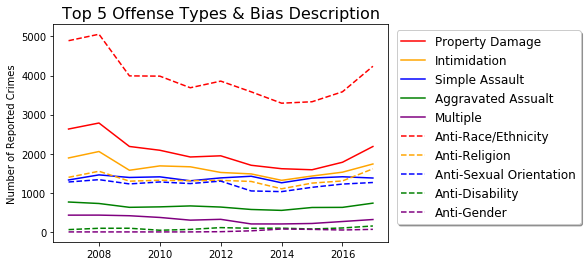

In [116]:
offense_name_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Property Damage': (2632, 2786, 2186, 2089, 1917, 1947, 1705, 1617, 1590, 1782, 2185), 'Intimidation': (1892, 2057, 1577, 1689, 1666, 1521, 1484, 1320, 1430, 1528, 1738), 'Simple Assault': (1329, 1459, 1393, 1409, 1308, 1382, 1424, 1257, 1377, 1411, 1379), 'Aggravated Assualt': (765, 727, 629, 641, 665, 636, 574, 551, 625, 628, 736), 'Multiple': (429, 430, 414, 370, 301, 322, 204, 204, 216, 266, 317)})
plt.plot('x', 'Property Damage', data=offense_name_trend_df, marker='', color='red')
plt.plot('x', 'Intimidation', data=offense_name_trend_df, marker='', color='orange')
plt.plot('x', 'Simple Assault', data=offense_name_trend_df, marker='', color='blue')
plt.plot('x', 'Aggravated Assualt', data=offense_name_trend_df, marker='', color='green')
plt.plot('x', 'Multiple', data=offense_name_trend_df, marker='', color='purple')
plt.plot('x', 'Anti-Race/Ethnicity', data=bias_desc_trend_df, marker='', color='red', linestyle='dashed')
plt.plot('x', 'Anti-Religion', data=bias_desc_trend_df, marker='', color='orange', linestyle='dashed')
plt.plot('x', 'Anti-Sexual Orientation', data=bias_desc_trend_df, marker='', color='blue', linestyle='dashed')
plt.plot('x', 'Anti-Disability', data=bias_desc_trend_df, marker='', color='green', linestyle='dashed')
plt.plot('x', 'Anti-Gender', data=bias_desc_trend_df, marker='', color='purple', linestyle='dashed')
plt.title("Top 5 Offense Types & Bias Description", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1.00),
          ncol=1, fancybox=True, shadow=True, fontsize=12)
plt.savefig("Q2_Top_5_Offense_Types_&_Bias_Description.png")